# Support Vector Machines
* Pros
    * effective with high dimensionality
    * lower memory usage (only a subset of Training data are utilized in decisions of assigning new members
    * versatility with flexible decision boundaries - kernels
* Cons
    * highly sensitive to kernel selection
    * poor when # of dimensions exceeds the # of observations
    * lack of direct probabilistic assignment in groups (as threshold is above/below a hyperplane)

## Linear SVM Classifier
* generate 2-D data
    * set seed
    * create matrix x, normally distributed - 2 Classes on 2 variables, each with 20 observations
    * create y variable - resulting in 1 or -1, with 10 observations in each class
* for y = 1, Mean moves from 0 to 1 (for each coordinates)
* plot this data - color code using plot character 19

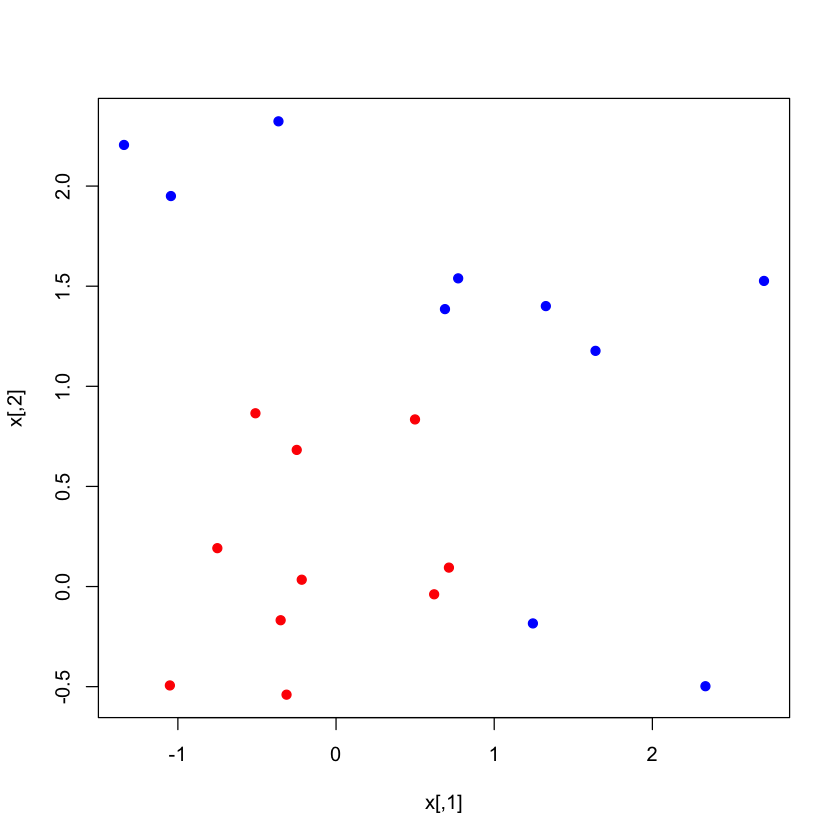

In [1]:
set.seed(10111)
x = matrix(rnorm(40), 20, 2)
y = rep(c(-1, 1), c(10, 10))
x[y == 1,] = x[y == 1,] + 1
plot(x, col = y + 3, pch = 19)

### e1071 contains the svm function - Load this Package

In [2]:
library(e1071)

Warning message:
“package ‘e1071’ was built under R version 3.5.2”

### Create a DataFrame - turn y, into a factor variable
* call SVM to this DataFrame
* y is the response variable - other variables are predictors
* kernel is linear, scale is false (not standardized)

In [3]:
dat = data.frame(x, y = as.factor(y))
svmfit = svm(y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)
print(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.5 

Number of Support Vectors:  6



* there are 6 support vectors, setting up the Decision Boundary

### Plot this decision boundary

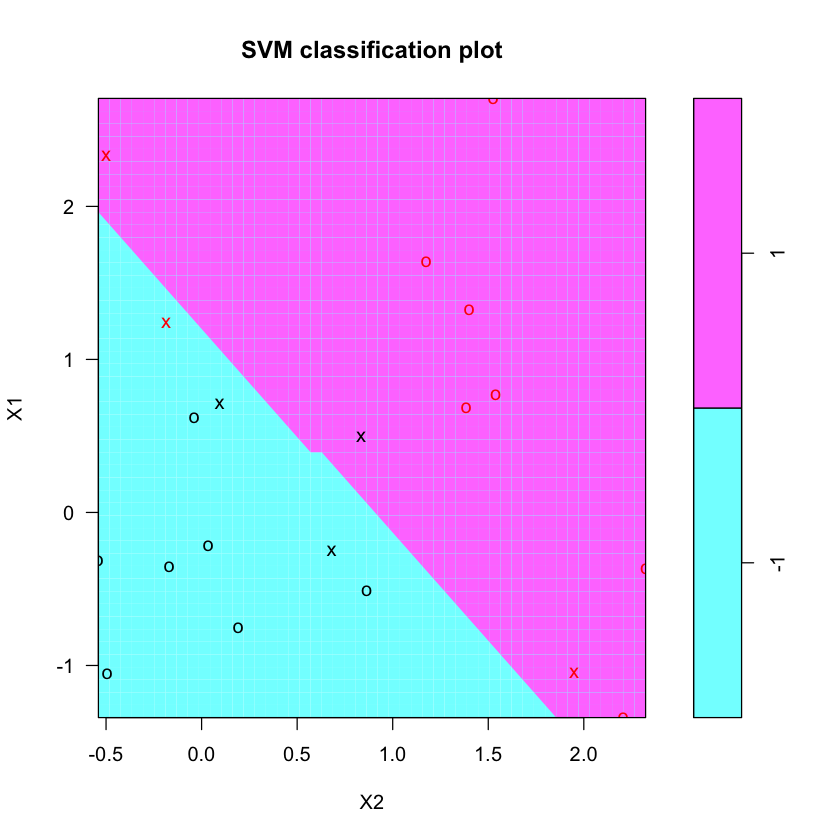

In [4]:
plot(svmfit, dat)

### Make a Plot - using make.grid
* create a lattice of values for x1 and x2
* make a 75 x 75 grid
* which takes data matrix x, and argument n (the # of points in each direction)

* use apply - get the range of each variable in x
* use seq - for a function to go from the lowest value to the upper value, for x1 and x2

* with x1 and x2, each 75 values long on the coordinates - use expand.grid (makes the lattice)

In [5]:
make.grid = function(x, n = 75) {
  grange = apply(x, 2, range)
  x1 = seq(from = grange[1,1], to = grange[2,1], length = n)
  x2 = seq(from = grange[1,2], to = grange[2,2], length = n)
  expand.grid(X1 = x1, X2 = x2)
}

* use make.grid - view the 1st 10 lattice values

In [6]:
xgrid = make.grid(x)
xgrid[1:10,]

X1,X2
-1.3406379,-0.5400074
-1.2859572,-0.5400074
-1.2312766,-0.5400074
-1.1765959,-0.5400074
-1.1219153,-0.5400074
-1.0672346,-0.5400074
-1.0125540,-0.5400074
-0.9578733,-0.5400074
-0.9031927,-0.5400074
-0.8485120,-0.5400074


* this new data, xgrid - using predict, call the response for ygrid
* index (within svmfit), provides which points are the support points
    * these can be included with the points function
    * points, also is used for the original points on the plot

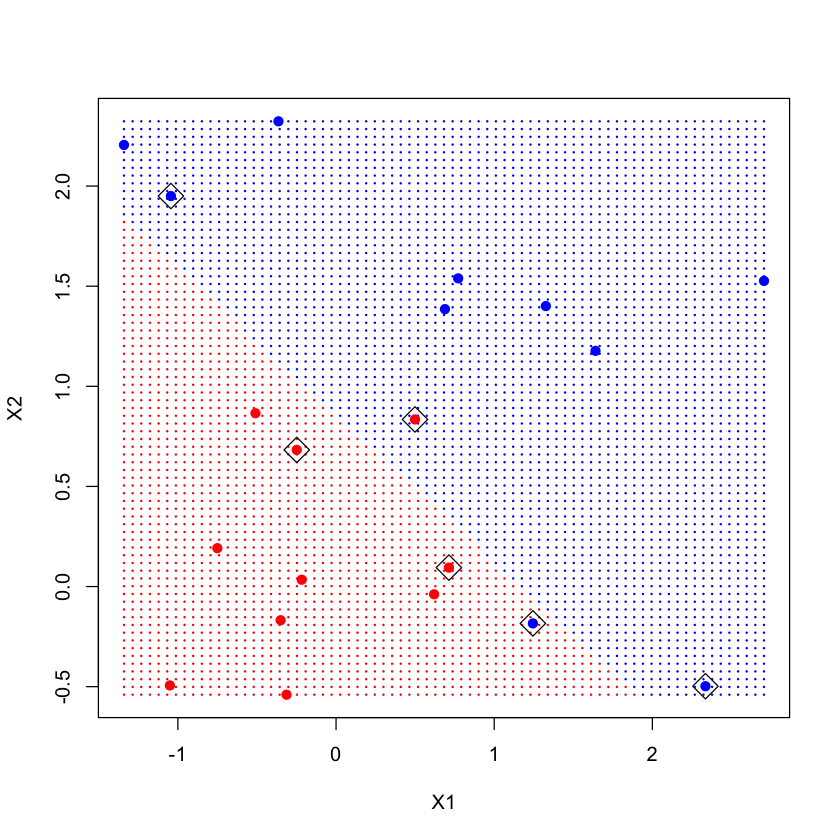

In [7]:
ygrid = predict(svmfit, xgrid)
plot(xgrid, col = c("red","blue")[as.numeric(ygrid)], pch = 20, cex = .2)
points(x, col = y + 3, pch = 19)
points(x[svmfit$index,], pch = 5, cex = 2)

* points (outlined in diamonds) are instrumental in defining the decision boundary

### Retrieve the Coefficients from the SVM
* beta
* beta0

In [8]:
beta = drop(t(svmfit$coefs)%*%x[svmfit$index,])

beta0 = svmfit$rho

### The Coefficients can now be used to plot decision boundary
* from the equation - ( beta0 + beta1 * x1 + beta2 * x2 = 0 )
* the equation provides the decision boundary slope and intercept
* use these values with the function, abline
* abline will need to used twice more, for the upper and lower boundary margins

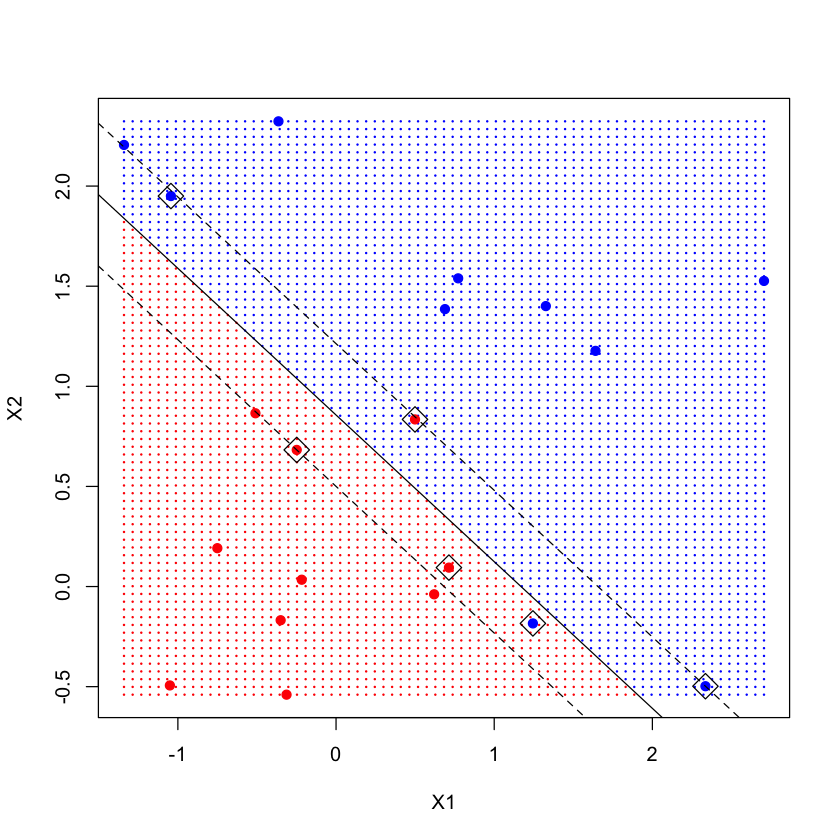

In [9]:
plot(xgrid, col = c("red", "blue")[as.numeric(ygrid)], pch = 20, cex = .2)

points(x, col = y + 3, pch = 19)
points(x[svmfit$index,], pch = 5, cex = 2)

abline(beta0 / beta[2], -beta[1] / beta[2])
abline((beta0 - 1) / beta[2], -beta[1] / beta[2], lty = 2)
abline((beta0 + 1) / beta[2], -beta[1] / beta[2], lty = 2)

* some of the point are within the margin

# Non-linear SVM Classifier
* using a non-canonical 2-D example
* data can be downloaded from: http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/ESL.mixture.rda

In [10]:
load(file = "../../Downloads/ESL.mixture.rda")

names(ESL.mixture)

[1] "x"        "y"        "xnew"     "prob"     "marginal" "px1"      "px2"     
[8] "means"

#### Variables, x and y, were used with the Linear SVM (above)
* these values need to be removed - to assign x and y variables to the new data

In [11]:
rm(x, y)

attach(ESL.mixture)

#### Plot this 2-D data

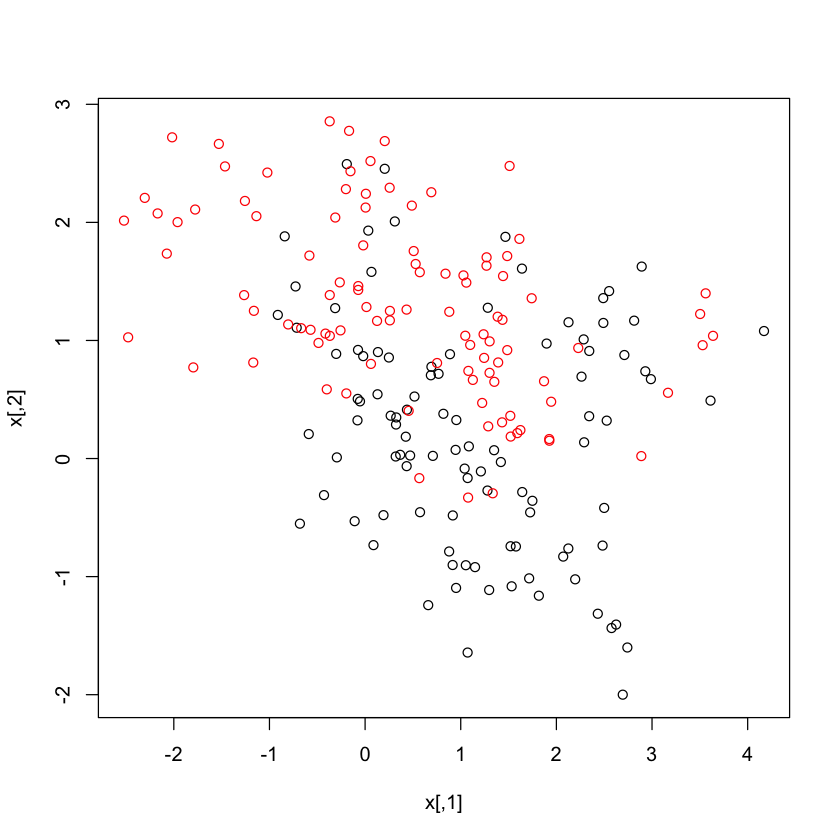

In [12]:
plot(x, col = y + 1)

* this dataset has a unique structure

### Create a DataFrame
* use y as the response, and turn it into a factor

### Fit the SVM
* using a radial kernel, and cost = 5

In [13]:
dat = data.frame(y = factor(y), x)

fit = svm(factor(y) ~ ., data = dat, scale = FALSE, kernel = "radial", cost = 5)

### Create Grid - Make Predictions
* grid points for this dataset - px1 & px2
* use expand.grid - for gird creation
* predict the classification for each grid value

In [14]:
xgrid = expand.grid(X1 = px1, X2 = px2)

ygrid = predict(fit, xgrid)

### Plot points, colored according to decision boundary
* this will be a non-linear boundary
* add points, to see where they land

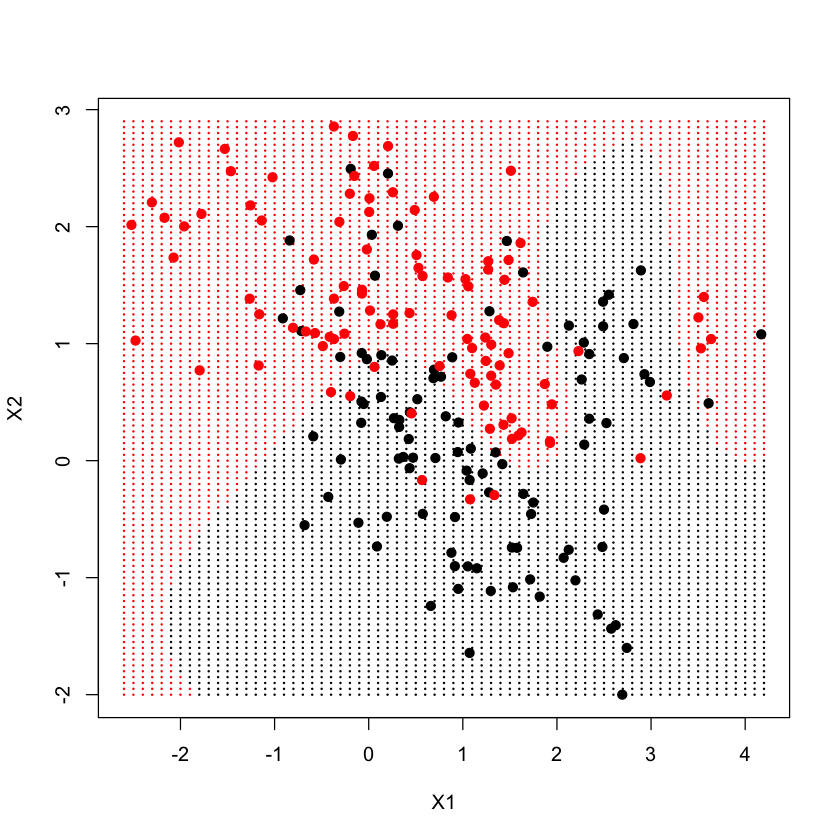

In [15]:
plot(xgrid, col = as.numeric(ygrid), pch = 20, cex = .2)

points(x, col = y + 1, pch = 19)

### Add curve lines for the boundary - using contour
* predict the fit onto the grid - decision.values = TRUE, for actual values
    * can then use the decision attribute
* follow the same steps as above for Creating the Grid, Predictions

### Contour function
* takes 2 grid sequences, a function, level argument, & add argument
* the matrix dimensions, px1 and px2, are 69 and 99
* level = 0, contour tracks the decision boundary (nice for non-linear plotting)
* level = 0.5, contour tracks decision boundary Probabilities (Bayes Decision Boundary)

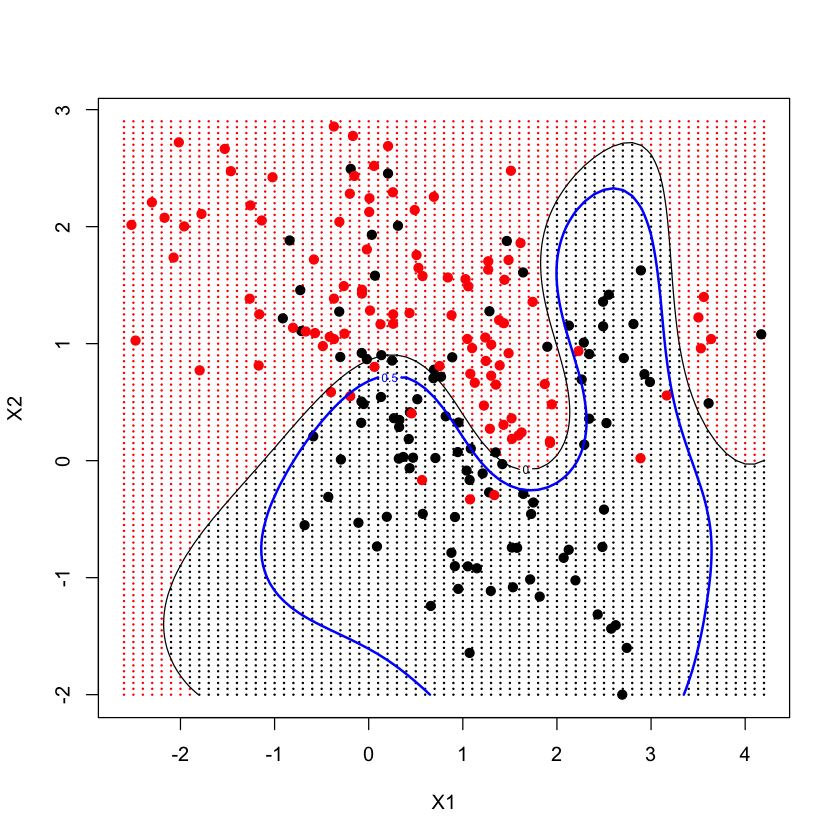

In [16]:
func = predict(fit, xgrid, decision.values = TRUE)
func = attributes(func)$decision

xgrid = expand.grid(X1 = px1, X2 = px2)
ygrid = predict(fit, xgrid)
plot(xgrid, col = as.numeric(ygrid), pch = 20, cex = .2)
points(x, col = y + 1, pch = 19)

contour(px1, px2, matrix(func, 69, 99), level = 0, add = TRUE)
contour(px1, px2, matrix(func, 69, 99), level = 0.5, add = TRUE, col = "blue", lwd = 2)

### The non-linear SVM turned out pretty similarly to the Bayes Decision Boundary